# Training neural nets

In [ ]:
!sudo pip install gdown

In [ ]:
!gdown https://drive.google.com/uc?id=1fFKvR46KP-tFEUuoc1FOs_y0HROLkVeb

In [ ]:
!mkdir -p data
!mv train_meta.pkl data/

In [1]:
from WikiSeriesNN import WikiSeriesNN

from WikiPlot import plot_prediction
from Seq2SeqConv import Seq2SeqConv
from Seq2SeqConvFull import Seq2SeqConvFull
from Seq2Seq import Seq2Seq
from os import path
import pickle
from PerformanceMetrics import smape

Using TensorFlow backend.


In [2]:
root_folder = "./data"
train_file = path.join(root_folder,"train_meta.pkl")

## Training Standard Seq2Seq

In [ ]:
series = WikiSeriesNN(train_file)

In [ ]:
seq2seq = Seq2Seq(series,60)

In [ ]:
seq2seq.fit(epochs=10)

In [ ]:
seq2seq.history_plot()

In [ ]:
saved_path = path.join(root_folder,"savedSeq2Seq.h5")
seq2seq.save_model(saved_path)

## Training Convolutional Seq2Seq WaveNet simple

In [ ]:
series = WikiSeriesNN(train_file)

In [ ]:
seq2seq = Seq2SeqConv(series,60)

In [ ]:
seq2seq.fit(epochs=10)

In [ ]:
seq2seq.history_plot()

In [ ]:
saved_path = path.join(root_folder,"seqConv.h5")
seq2seq.save_model(saved_path)

## Training Fully Convolutional Seq2Seq WaveNet simple

In [3]:
series = WikiSeriesNN(train_file)

Data ranges from 2015-07-01 to 2017-09-10


In [4]:
seq2seq = Seq2SeqConvFull(series,60)

Train encoding: 2015-07-01 00:00:00 - 2017-05-13 00:00:00
Train prediction: 2017-05-14 00:00:00 - 2017-07-12 00:00:00 

Val encoding: 2015-08-30 00:00:00 - 2017-07-12 00:00:00
Val prediction: 2017-07-13 00:00:00 - 2017-09-10 00:00:00

Encoding interval: 683
Prediction interval: 60


W0622 16:36:15.551457 139816136709888 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0622 16:36:15.568211 139816136709888 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0622 16:36:15.572211 139816136709888 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0622 16:36:19.587138 139816136709888 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0622 16:36:19.596768 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, None, 16)     32          input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, None, 32)     1056        conv1d_1[0][0]                   
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, None, 32)     1056        conv1d_1[0][0]                   
__________________________________________________________________________________________________
activation

In [5]:
seq2seq.fit(epochs=10, batch_size= 2 ** 8)

(40000, 742, 1)
(40000, 60, 1)


W0622 16:36:23.109582 139816136709888 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 150s 5ms/step - loss: 0.2704 - val_loss: 0.2581
Epoch 2/10
32000/32000 [==============================] - 132s 4ms/step - loss: 0.2441 - val_loss: 0.2552
Epoch 3/10
32000/32000 [==============================] - 132s 4ms/step - loss: 0.2407 - val_loss: 0.2520
Epoch 4/10
32000/32000 [==============================] - 132s 4ms/step - loss: 0.2380 - val_loss: 0.2497
Epoch 5/10
32000/32000 [==============================] - 132s 4ms/step - loss: 0.2361 - val_loss: 0.2471
Epoch 6/10
32000/32000 [==============================] - 132s 4ms/step - loss: 0.2345 - val_loss: 0.2455
Epoch 7/10
32000/32000 [==============================] - 132s 4ms/step - loss: 0.2334 - val_loss: 0.2453
Epoch 8/10
32000/32000 [==============================] - 132s 4ms/step - loss: 0.2324 - val_loss: 0.2446
Epoch 9/10
32000/32000 [==============================] - 132s 4ms/step - loss: 0.2318 - val_loss: 0.24

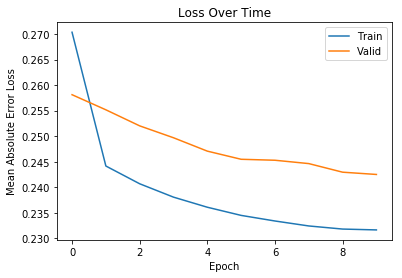

In [6]:
seq2seq.history_plot()

In [7]:
saved_path = path.join(root_folder,"seqConvFull.h5")
seq2seq.save_model(saved_path)